
# [Link to my Youtube Video Explaining this whole Notebook](https://youtu.be/csQj1e6Oj38?list=PLxqBkZuBynVS8mDTc8ZGermXiS-32pR2y)

[![Imgur](https://imgur.com/BlX0rqL.png)](https://youtu.be/csQj1e6Oj38?list=PLxqBkZuBynVS8mDTc8ZGermXiS-32pR2y)

---

#### Special Note - DCGAN on CELEBA dataset being particularly CPU and GPU intensive operation, and hence inside Kaggle or even Google-Colab, I was getting Out-of-memory limits. So there I could NOT run this Notebook with any larger dataset containing more than 1000 images. Hence the resultant fake images generated at the end will almost be like noise.

#### But if you run this Notebook with the full CelebA Dataset of 202,599 number of face images (and around 100 epochs), keeping those images in some cloud like Google Cloud / AWS etc and with some cloud-GPU, then the resultant fake images will be very much close to real. 

---

#### Now I have already downloaded the CELEBA Dataset to my local Machine from [Kaggle](https://www.kaggle.com/jessicali9530/celeba-dataset). And so I will be loading this Data from my local drive in below.

### Below I am explaining some issues you may face when you decide to store your CelebA dataset in Google Drive and your notebook in Google Colab. So in this case you are reading the data from Google Drive and while working in Colab.

I faced some problem in this approach, and hence finally decided to keep the CelebA dataset directly in Colab's session storage. But note, session storage will be completely deleted as soon as you your Colab session ends.

---

In [ ]:
# ************ START OF ALL ONE-TIME-ONLY-CODES  *************

# Installation of Kaggle package - ONE TIME ONLY-Just before the one-time pulling of data from 
# Kaggle dataset to my G-Drive
# !pip install --upgrade --force-reinstall --no-deps kaggle

# TO ACTUALLY IMPORT KAGGLE DATA TO G-DRIVE - ONE TIME CODE
# import os
# os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/Kaggle_Datasets'
# os.chdir('/content/drive/MyDrive/celeba-dataset')
# !kaggle datasets download -d jessicali9530/celeba-dataset

''' IMPORTANT - While connecting Colab with G-Drive where dataset lives in Google-Drive - I necessarily have to do os.chdir before running the unzip command.

Else just running below unzip command will unzip all the files into Colab's Virtual Machine's current session storage. Which will get deleted after the session ends (12h or 24 Hours).

But - I sometime do need to get the unzipped done in Colab's Virtual Machine's session-storage because..

1. Unzipping to Colab's own session-storage took like 100 seconds while unzipping to G-Drive took 25/30 minutes for CelebA 1GB .zip file.

2. MORE IMPORTANTLY - I could NOT run run os.listdir() at all while reading to 200k CELEB-A .jpg files from Colab. Got Input/Output error. Many have got this as stated in SO Questions.

Official Explanations - https://research.google.com/colaboratory/faq.html#drive-timeout

But reading the same 200k files from Colab's Session Storage was super-fast.

'''

# Unzip Data - ONE TIME ONLY in G-Drive but for CELEB-A Dataset I have run it in Colab every time
# As Colab can not read full 200k data from G-Drive with os.listdir()
# !unzip /content/drive/MyDrive/celeba-dataset/celeba-dataset.zip

# ************ END OF ALL ONE-TIME-ONLY-CODES  *************

# ********** Below FOR GOOGLE DRIVE AND COLAB *****************

# import os
# from google.colab import drive
# drive.mount('/content/gdrive')
# os.chdir('/content/drive/MyDrive/celeba-dataset')

# Facial Attribute prediction

Facial Attribute prediction is a Computer Vision (CV) task about deducing the set of attributes belonging to a face. Example attributes are the color of hair, hairstyle, age, gender, etc.

Facial attribute analysis has received considerable attention when deep learning techniques made
remarkable breakthroughs in this field over the past few
years.

Deep learning based facial attribute analysis consists of two basic sub-issues:

facial attribute estimation (FAE), which recognizes whether facial attributes are present in given images, and

facial attribute manipulation (FAM), which synthesizes or removes desired facial attributes.

---

### Getting to know CELEB-A Dataset

202,599 number of face images of various celebrities
10,177 unique identities, but names of identities are not given
40 binary attribute annotations per image
5 landmark locations

#### Data Files

- <b>img_align_celeba.zip</b>: All the face images, cropped and aligned
- <b>list_eval_partition.csv</b>: Recommended partitioning of images into training, validation, testing sets. Images 1-162770 are training, 162771-182637 are validation, 182638-202599 are testing
- <b>list_bbox_celeba.csv</b>: Bounding box information for each image. "x_1" and "y_1" represent the upper left point coordinate of bounding box. "width" and "height" represent the width and height of bounding box
- <b>list_landmarks_align_celeba.csv</b>: Image landmarks and their respective coordinates. There are 5 landmarks: left eye, right eye, nose, left mouth, right mouth
- <b>list_attr_celeba.csv</b>: Attribute labels for each image. There are 40 attributes. "1" represents positive while "-1" represents negative

## The Facial Attributes of CELEB-A Dataset

![Imgur](https://imgur.com/reRs5Jk.png)

The Dataset is considerably large to manage with even Google Colab's Pro version. I got out-of-memory quite a few times. Could not work at all with the full set of 200k images.

### A quick tip in this regard if you are using local-machine to handle this dataset-challenge.

If you have a Solid-State Drive (SSD) with enough space plugged in your
machine, I highly recommend you move all of your training samples to
the SSD, especially when you have a powerful graphics card. Because
when you are training neural networks on a very large dataset, which
cannot fit in the GPU memory, the reading speed from physical drives
could be the bottleneck of your training performance. Sometimes, the
speed-up of SSD (reading samples at 50 MB/s) over the traditional hard
drive (5 MB/s) can save you a big chunk of training time.

---

# Fundamental way GAN Works


GAN contains two networks which has two competing objectives:

Generator: the generator generates new data instances that are "similar" to the training data, in our case celebA images. Generator takes random latent vector and output a "fake" image of the same size as our reshaped celebA image.

Discriminator: the discriminator evaluate the authenticity of provided images; it classifies the images from the generator and the original image. Discriminator takes true of fake images and output the probability estimate ranging between 0 and 1.

![Imgur](https://imgur.com/pLJdmxs.png)


### The basic objective function of a vanilla GAN model is the following:

![Imgur](https://imgur.com/LMjhfKk.png)

Here, D refers to the discriminator network, while G obviously refers to the generator.

As the formula shows, the generator optimizes for maximally confusing the discriminator, by trying to make it output high probabilities for fake data samples.

On the contrary, the discriminator tries to become better at distinguishing samples coming from G from samples coming from the real distribution.

The GAN training process consists of a two-player minimax game in which D is adapted to minimize the discrimination error between real and generated samples, and G is adapted to maximize the probability of D making a mistake. When G does a good enough job to fool D, the output probability should be close to 1.

---

# Regular Neural Network vs CNN


Unlike a regular feed-forward neural network whose neurons
are arranged in flat, fully connected layers, layers in a
ConvNet are arranged in three dimensions (width × height ×
depth).

Convolutions are performed by sliding one or more filters (the smaller Matrix which is the Kernel of the Current Layer) over the input layer. Each filter has a relatively small receptive field (width × height) but always extends through the
entire depth of the input volume.

At every step as it slides across the input, each filter outputs a single activation value: the dot product between the input values and the filter entries.

Convolutional Neural Networks (CNNs) are neural networks with architectural constraints to reduce computational complexity and ensure translational invariance (the network interprets input patterns the same regardless of translation— in terms of image recognition: a banana is a banana regardless of where it is in the image). 

#### Convolutional Neural Networks have three important architectural features.

**Local Connectivity**: Neurons in one layer are only connected to neurons in the next layer that are spatially close to them. This design trims the vast majority of connections between consecutive layers, but keeps the ones that carry the most useful information. The assumption made here is that the input data has spatial significance, or in the example of computer vision, the relationship between two distant pixels is probably less significant than two close neighbors.

**Shared Weights**: This is the concept that makes CNNs "convolutional." By forcing the neurons of one layer to share weights, the forward pass (feeding data through the network) becomes the equivalent of convolving a filter over the image to produce a new image. The training of CNNs then becomes the task of learning filters (deciding what features you should look for in the data.)

**Pooling and ReLU**: CNNs have two non-linearities: pooling layers and ReLU functions. Pooling layers consider a block of input data and simply pass on the maximum value. Doing this reduces the size of the output and requires no added parameters to learn, so pooling layers are often used to regulate the size of the network and keep the system below a computational limit. The ReLU function takes one input, x, and returns the maximum of {0, x}. ReLU(x) = argmax(x, 0). This introduces a similar effect to tanh(x) or sigmoid(x) as non-linearities to increase the model's expressive power.

---


# Deep Convolutional GANs (DCGANs)

Deep Convolutional GANs (DCGANs) introduced convolutions to the generator and discriminator networks.

However, this was not simply a matter of adding convolutional layers to the model, since training became even more unstable.

---

## Generator Architecture

![Imgur](https://imgur.com/bHX4suR.png)

The generator network of a DCGAN contains 4 hidden layers (we treat the input layer as
the 1st hidden layer for simplicity) and 1 output layer. Transposed convolution layers are
used in hidden layers, which are followed by batch normalization layers and ReLU
activation functions. The output layer is also a transposed convolution layer and Tanh is
used as the activation function.

The 2nd, 3rd, and 4th hidden layers and the output layer have a stride value of 2. The 1st layer
has a padding value of 0 and the other layers have a padding value of 1. As the
image (feature map) sizes increase by two in deeper layers, the numbers of channels are
decreasing by half. This is a common convention in the architecture design of neural
networks. All kernel sizes of transposed convolution layers are set to 4 x 4. The output
channel can be either 1 or 3, depending on whether you want to generate grayscale images
or color images.

## The architecture of a discriminator

![Imgur](https://imgur.com/HQWoKrF.png)

The discriminator network of a DCGAN consists of 4 hidden layers (again, we treat the
input layer as the 1st hidden layer) and 1 output layer. Convolution layers are used in all
layers, which are followed by batch normalization layers except that the first layer does not
have batch normalization. LeakyReLU activation functions are used in the hidden layers
and Sigmoid is used for the output layer. The architecture of the discriminator is shown in
the following:

The input channel can be either 1 or 3, depending on whether you are dealing with
grayscale images or color images. All hidden layers have a stride value of 2 and a padding
value of 1 so that their output image sizes will be half the input images. As image sizes
increase in deeper layers, the numbers of channels are increasing by twice. All kernels in
convolution layers are of a size of 4 x 4. The output layer has a stride value of 1 and a
padding value of 0. It maps 4 x 4 feature maps to single values so that the Sigmoid function
can transform the value into prediction confidence.

---


### Several tricks had to be applied to make DCGANs stable and useful:

Batch normalization was applied to both the generator and the discriminator network
Dropout is used as a regularization technique
The generator needed a way to upsample the random input vector to an output image. Transposing convolutional layers is employed here
LeakyRelu and TanH activations are used throughout both networks

------------------------------------------------------------------------------

# How Reverse ConvNets works in DCGAN

ConvNets have traditionally been used for image classification
tasks, in which the network takes in an image with the
dimensions height × width × number of color channels as
input and—through a series of convolutional layers—outputs a
single vector of class scores, with the dimensions 1 × n, where
n is the number of class labels.

In DCGAN, under the Generator part, to generate an image by using the ConvNet architecture, we reverse the process: instead of taking an image and processing it into a vector, we take a
vector and up-size it to an image.

So, overall, the core to the DCGAN architecture uses a standard CNN architecture on the discriminative model.

But for the generator, convolutions are replaced with up-convolutions, so the representation at each layer of the generator is actually successively larger, as it maps from a low-dimensional latent vector onto a high-dimensional image.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import glob
import numpy as np # linear algebra
import pandas as pd 

from PIL import Image
import matplotlib.pyplot as plt
import os

from tensorflow.keras import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dropout,Dense,Flatten,Conv2DTranspose,BatchNormalization,LeakyReLU,Reshape

import tensorflow as tf
from tensorflow.keras.utils import plot_model

2021-10-26 14:56:15.538911: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-26 14:56:15.538945: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
# First I am creating an array containing all the full path names for each of the .jpg file
# The purpose to crete this array is to be able to select only limited number of training_images to train from this array

all_image_path = []

# full_image_train_path = '../input/celeba-dataset/img_align_celeba/img_align_celeba'
# When running in Kaggle

full_image_train_path = "../input/img_align_celeba/img_align_celeba/"
# When running in Local Machine  

# full_image_train_path = "/content/gdrive/MyDrive/celeba-dataset/img_align_celeba/img_align_celeba"  
# When running in Colab with data in G-Drive

# full_image_train_path =  "/content/img_align_celeba/img_align_celeba/"
# For reading from Colab sesstion storage as g-drive is failing for large 200k files of CelebA

# Now from this array 
for path in os.listdir(full_image_train_path):
  if '.jpg' in path:
    all_image_path.append(os.path.join(full_image_train_path, path))
    
image_path_50k = all_image_path[0:500]

print(len(image_path_50k))
# print(image_path_50k)

500


In [4]:
# Model Constants
PLOTS_DPI = 150

In [5]:
# Alternative way to build the numpy array for all the training images
# For getting the list of training_images - I COULD REPLACE THE ABOVE os.listdir() with glob like below

# full_image_train_path = "../input/img_align_celeba/img_align_celeba/*.*"  

# # But even the above got timed-out when connecting Colab with Google Drive by pulling the data residing in GDrive
# # https://research.google.com/colaboratory/faq.html#drive-timeout

# img_list = glob.glob(full_image_train_path)

# # image_path_50k = all_image_path[0:500]
# image_path_50k = img_list[0:500]

# print(len(image_path_50k))

crop = (30, 55, 150, 175) #croping size for the image so that only the face at centre is obtained

training_images = [np.array((Image.open(path).crop(crop)).resize((64,64))) for path in image_path_50k]

for i in range(len(training_images)):
    training_images[i] = ((training_images[i] - training_images[i].min())/(255 - training_images[i].min()))
    #training_images[i] = training_images[i]*2-1  #uncomment this if activation is tanh for generator last layer
    
training_images = np.array(training_images) 

### Scaling images 

it is also recommended that real images used to train the discriminator are scaled so that their pixel values are in the range [-1,1]. This is so that the discriminator will always receive images as input, real and fake, that have pixel values in the same range.

Typically, image data is loaded as a NumPy array such that pixel values are 8-bit unsigned integer (uint8) values in the range [0, 255].

In [6]:
%%time

''' croping size for the image to have only the face at centre is obtained 

Image.crop(box=None)

Returns a rectangular region from this image. The box is a 4-tuple defining the left, upper, right, and lower pixel coordinate

'''

# For the Image.crop function argument box –
# which is the crop rectangle, as a (left, upper, right, lower)-tuple.
# The crop method from the Image module takes four coordinates as input.
# The right can also be represented as (left+width)
# and lower can be represented as (upper+height).
cropping_box = (30, 55, 150, 175) 

# To load an image from a file, we use the open() function in the Image module, passing it the path to the image.
training_images = [np.array((Image.open(path).crop(cropping_box)).resize((64,64))) for path in image_path_50k]
# print(training_images)

''' [[[ 10,  10,  10],
      [ 15,  15,  17],
      ...
      [187, 233, 233],
      [188, 233, 234]]
        
'''


'''
Normalizing images to range in 0-1

Neural networks process inputs, using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values so that each pixel value has a value between 0 and 1.

A pixel value can change between 0-255; if an image is fully red, then the RGB value is (255,0,0), where red is denoted by 255 and green and blue are 0.

normalized = (x-min(x))/(max(x)-min(x))

And in this case the largest pixel value is 255.

So if the intensity of RGB is (0,0,0) then it will be a dark or black image, and again if the intensity of RGB is (255,255,255), the image will be white. 
'''
for i in range(len(training_images)):
    training_images[i] = ((training_images[i] - training_images[i].min())/(255 - training_images[i].min()))
    
training_images = np.array(training_images) 
# training_images is a 4-D array

# print(training_images)
''' [[[0.03921569 0.03921569 0.03921569]
   [0.05882353 0.05882353 0.06666667]
   ...
   ...
    [0.59349593 0.4796748  0.41463415]
   [0.6504065  0.54471545 0.48780488]]]]
'''

print(training_images.shape) # (500, 64, 64, 3)

# print(np.min(training_images, axis=0))
# print(np.max(training_images, axis=0))

(500, 64, 64, 3)
CPU times: user 473 ms, sys: 27.3 ms, total: 500 ms
Wall time: 500 ms


In [7]:
len(full_image_train_path)

print(training_images.shape)  

(500, 64, 64, 3)


<Figure size 720x720 with 0 Axes>

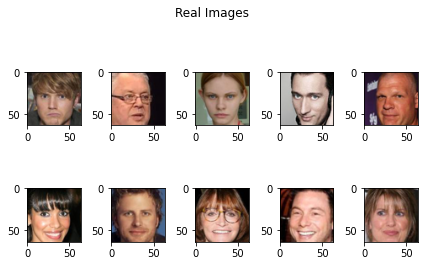

In [8]:
plt.figure(figsize=(10,10))
fig,ax=plt.subplots(2,5)
fig.suptitle("Real Images")
idx=8

for i in range(2):
    for j in range(5):
            ax[i,j].imshow(training_images[idx].reshape(64,64,3))            
            idx+=6
            
plt.tight_layout()
plt.show()

# Transposed Convolutions

![Imgur](https://imgur.com/55ldJ7M.png)

The 2×2 kernel produces a 2×2 output when convolving over a 3×3 image.

But I want to work in the opposite direction, i.e., to use a smaller input and to learn its larger representation, being the following:

![Imgur](https://imgur.com/er12xAe.png)

Thats where the Transposed convolutions in the Keras API comes to help.

The Conv2DTranspose layer learns a number of filters, similar to the regular Conv2D layer.

Remember that the transpose layer simply swaps the backwards and forward pass, keeping the rest of the operations the same!

As the transposed convolution will also slide over the input, we must specify a kernel_size, as with the normal convolution. Similarly we got to specify strides, output_padding 

#  UpSampling2D vs Conv2DTranspose in Keras

UpSampling2D is just a simple scaling up of the image by using nearest neighbour or bilinear upsampling, so nothing smart. Advantage is it's cheap.

Conv2DTranspose is a convolution operation whose kernel is learnt (just like normal conv2d operation) while training your model. Using Conv2DTranspose will also upsample its input but the key difference is the model should learn what is the best upsampling for the job.

# Generator

#### I use Leaky relu activations in the hidden layer neurons, and sigmoids for the output layers. Originally, ReLU was recommend for use in the generator model and LeakyReLU was recommended for use in the discriminator model, although more recently, the LeakyReLU is recommended in both models.

The generator consists of convolutional-transpose layers, batch normalization layers, and ReLU activations. The output will be a 3x64x64 RGB image.


## Use of Batch Normalization

Batch normalization standardizes the activations from a prior layer to have a zero mean and unit variance. This has the effect of stabilizing the training process.

Batch normalization limits the amount by which updating the
parameters in the previous layers can affect the distribution of
inputs received by the current layer. This decreases any
unwanted interdependence between parameters across layers,
which helps speed up the network training process and
increase its robustness, especially when it comes to network
parameter initialization.


Batch normalization is used after the activation of convolution in the discriminator model

and after transpose convolutional layers in generator model.

It is added to the model after the hidden layer, but before the activation, such as LeakyReLU.

### For understanding parameters look at this blog

https://towardsdatascience.com/understand-transposed-convolutions-and-build-your-own-transposed-convolution-layer-from-scratch-4f5d97b2967


In [9]:
noise_shape = 100

#  Generator will upsample our seed using convolutional transpose layers (upsampling layers)
def generator_model():
  generator=Sequential()
  
  # Random noise to 4x4x512 image
  generator.add(Dense(4*4*512, input_shape=[noise_shape]))
  
  #  Next, add a reshape layer to the network to reshape the tensor from the 
  # last layer to a tensor of a shape of (4, 4, 512):
  generator.add(Reshape([4,4,512]))
  generator.add(Conv2DTranspose(256, kernel_size=4, strides=2, padding="same"))
  # BatchNormalization is added to the model after the hidden layer, but before the activation, such as LeakyReLU.
  generator.add(BatchNormalization())
  generator.add(LeakyReLU(alpha=0.2))
  
  generator.add(Conv2DTranspose(128, kernel_size=4, strides=2, padding="same"))
  generator.add(LeakyReLU(alpha=0.2))
  
  generator.add(BatchNormalization())
  generator.add(Conv2DTranspose(64, kernel_size=4, strides=2, padding="same"))
  generator.add(LeakyReLU(alpha=0.2))
  generator.add(BatchNormalization())
  generator.add(Conv2DTranspose(3, kernel_size=4, strides=2, padding="same",
                                  activation='sigmoid'))
  return generator

generator = generator_model()
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8192)              827392    
_________________________________________________________________
reshape (Reshape)            (None, 4, 4, 512)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 8, 8, 256)         2097408   
_________________________________________________________________
batch_normalization (BatchNo (None, 8, 8, 256)         1024      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 16, 16, 128)       524416    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 128)       0

2021-09-15 16:46:47.859356: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-15 16:46:47.859723: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-15 16:46:47.859786: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2021-09-15 16:46:47.859842: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2021-09-15 16:46:47.859896: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

### Lets see how our generator is creating images from noise. Lets generate a sample image with the below code.

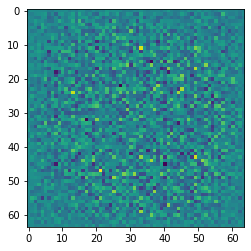

In [10]:
# First create a random noise 
noise = tf.random.normal([1,100])
generated_image = generator(noise, training=False)
# print(generated_image)
plt.imshow(generated_image[0, :, :, 0])

# It is just plain noise. But, the fact that it can create an image from a random noise array proves the model's power.


# Discriminator

Here I am creating a Sequential model incrementally via the add() method:

In [11]:
def discriminator_model():
  discriminator = Sequential()
  discriminator.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=[64,64, 3]))
  discriminator.add(LeakyReLU(alpha=0.2))
  discriminator.add(Dropout(0.4))
  discriminator.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
  discriminator.add(BatchNormalization())
  discriminator.add(LeakyReLU(alpha=0.2))  
  discriminator.add(Dropout(0.4))
  discriminator.add(Flatten())
  discriminator.add(Dense(1, activation='sigmoid'))
  return discriminator

discriminator = discriminator_model()

discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
batch_normalization_3 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)       

# DCGAN - Combining Generator and Discriminator

The combined model is stacked generator and discriminator

## Setting discriminator.trainable to False.

Why would we want to do this?

Well, we aren’t going to be training the generator model directly — we are going to be combining the generator and discriminator into a single model, then training that. This allows the generator to understand the discriminator so it can update itself more effectively.

Setting discriminator.trainable to False will only affect the copy of the discriminator in the combined model. This is good! If the copy of the discriminator in the combined model were trainable, it would update itself to be worse at classifying images.

To combine the generator and discriminator, we will be calling the discriminator on the output of the generator.



In [12]:
GAN =Sequential([generator,discriminator])

discriminator.compile(optimizer='adam',loss='binary_crossentropy')

# When we train this network, we don't want to train the discriminator network, 
# so make it non-trainable before we add it to the adversarial model.
discriminator.trainable = False

GAN.compile(optimizer='adam',loss='binary_crossentropy')

GAN.layers

GAN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 64, 64, 3)         3585219   
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 55361     
Total params: 3,640,580
Trainable params: 3,584,323
Non-trainable params: 56,257
_________________________________________________________________


# Final DCGAN Training

Training GANs is an art form itself, as incorrect hyperparameter settings lead to mode collapse. So play with different hyperparameters to obtain better results.

### Final Training Architecture of a DCGAN

1. Initially, both of the networks are naive and have random weights.

2. The standard process to train a DCGAN network is to first train the discriminator on the batch of samples.

3. To do this, we need fake samples as well as real samples. We already have the real samples, so we now
need to generate the fake samples.

4. To generate fake samples, create a latent vector of a shape of (100,) over a uniform distribution. Feed
this latent vector to the untrained generator network. The generator network will generate fake samples
that we use to train our discriminator network. So the training loop begins with generator receiving a random seed as input. That seed is used to produce an image. 

5. Concatenate the real images and the fake images to create a new set of sample images. We also need to
create an array of labels: label 1 for real images and label 0 for fake images.

6. The discriminator is then used to classify real images (drawn from the training set) and fakes images (produced by the generator). 

7. The loss is calculated for each of these models
In the process defined below I am training the generator and discriminator simultaneously.

## DCGAN is super sensitive

Here, even when we only train a GAN to manipulate 1D data, we have to use multiple
techniques to ensure a stable training. A lot of things could go wrong in the training of
GANs. For example, either a generator or a discriminator could overfit if one or the other
does not converge. Sometimes, the generator only generates a handful of sample varieties.
This is called mode collapse. 

It's important that the generator and discriminator do not overpower each other (e.g., that they train at a similar rate).

At the beginning of the training, the generated images will look like random noise. As training progresses, the generated images will look increasingly real just like original celeb-a images. After about 300 epochs, they resemble almost the original.

### Since we are training two models at once, the discriminator and the generator, we can’t rely on Keras’ .fit function. Instead, we have to manually loop through each epoch and fit the models on batches.

In [13]:
training_images.shape[0]//100

5

In [ ]:
epochs = 1
batch_size = 64

loss_from_discriminator_model=[] # Array to collect loss for the discriminator model

loss_from_generator_model=[] # Array to collect loss for generator model

with tf.device('/gpu:0'):
 for epoch in range(epochs):
    print(f"Currently training on Epoch {epoch+1}")
    
    # Loop over each batch in the dataset
    for i in range(training_images.shape[0]//batch_size):
    # Benefits of Double Division Operator over Single Division Operator in Python
    # The Double Division operator in Python returns the floor value for both integer and floating-point arguments after division.
        
        if (i)%100 == 0:
            print(f"\tCurrently training on batch number {i} of {len(training_images)//batch_size}")
        
        #  Start by sampling a batch of noise vectors from a uniform distribution
        # generator receives a random seed as input which is used to produce an image.
        noise=np.random.uniform(-1,1,size=[batch_size, noise_shape])
        
        ''' Generate a batch of fake images using the generator network
        
        The difference between predict() and predict_on_batch() - lies in when you pass as x data that is larger than one batch.

        predict() -  will go through all the data, batch by batch, predicting labels. It thus internally does the splitting in batches and feeding one batch at a time.

        predict_on_batch() - on the other hand, assumes that the data you pass in is exactly one batch and thus feeds it to the network. It will not try to split it
        
        In summary, predict method has extra operations to ensure a collection of batches are processed right, whereas, predict_on_batch is a lightweight alternative to predict that should be used on a single batch.
        '''
        gen_image = generator.predict_on_batch(noise)
        # We do this by first sampling some random noise from a random uniform distribution, 
        # then getting the generator’s predictions on the noise. 
        # The noise variable is the code equivalent of the variable z, which we discussed earlier.
        
        # Now I am taking real x_train data
        # by sampling a batch of real images from the set of all image
        train_dataset = training_images[i*batch_size:(i+1)*batch_size]
        
        # Create Labels
        # First training on real image
        train_labels_real=np.ones(shape=(batch_size,1))
        
        discriminator.trainable = True
        
        #  Next, train the discriminator network on real images and real labels:
        d_loss_real = discriminator.train_on_batch(train_dataset,train_labels_real)
        
        #Now training on fake image
        train_labels_fake=np.zeros(shape=(batch_size,1))
        
        d_loss_fake = discriminator.train_on_batch(gen_image,train_labels_fake)
        
        # Creating variables to make ready the whole adversarial network
        noise=np.random.uniform(-1,1,size=[batch_size,noise_shape])
        
        # Image Label vector that has all the values equal to 1
        # To fool the Discriminator Network
        train_label_fake_for_gen_training =np.ones(shape=(batch_size,1))
        
        discriminator.trainable = False
        
        ''' Now train the generator
        To train the generator network, we have to train the adversarial model.
        When we train the adversarial model, it trains the generator network only
        but freezes the discriminator network. We won't train the discriminator
        network, as we have already trained it.
        '''
        g_loss = GAN.train_on_batch(noise, train_label_fake_for_gen_training)
        
        ''' So what I am doing above in short is,
        I train the adversarial model on the batch of noise vectors and real
        labels. Here, real labels is a vector with all values equal to 1. 
        
        I am also training the generator to fool the discriminator network. To do
        this, I provide it with a vector that has all the values equal to 1. 
        
        In this step, the generator will receive feedback from the generator
        network and improve itself accordingly.
        '''
        
        loss_from_discriminator_model.append(d_loss_real+d_loss_fake)
        
        loss_from_generator_model.append(g_loss)
        
    ''' There is a passive method to evaluate the training process. After every 50
    epochs, generate fake images and manually check the quality of the images:
    These images will help you to decide whether to continue the training or to
    stop it early. Stop the training if quality of the generated high-resolution
    images is good. Or continue the training until your model becomes good.

    '''
    if epoch % 50 == 0:
        samples = 10
        x_fake = generator.predict(np.random.normal(loc=0, scale=1, size=(samples,100)))

        for k in range(samples):
            plt.subplot(2, 5, k+1)
            plt.imshow(x_fake[k].reshape(64,64,3))
            plt.xticks([])
            plt.yticks([])

        
        plt.tight_layout()
        plt.show()
    print('Epoch: %d,  Loss: D_real = %.3f, D_fake = %.3f,  G = %.3f' %   (epoch+1, d_loss_real, d_loss_fake, g_loss))        

print('Training completed with all epochs')

In [ ]:
for i in range(5):
  plt.figure(figsize=(7,7))   
for k in range(20):
          noise=np.random.uniform(-1,1,size=[100,noise_shape])
          im=generator.predict(noise) 
          plt.subplot(5, 4, k+1)
          plt.imshow(im[k].reshape(64,64,3))
          plt.xticks([])
          plt.yticks([])
 
plt.tight_layout()
plt.show()